In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# File names:
# DEMO (Demographics)
# HDL (HDL levels)
# TRIG (Triglycerides and LDL levels)
# TCHOL (Total cholesterol levels)

DEMO05 = pd.read_csv('DEMO_D_05.csv')
DEMO07 = pd.read_csv('DEMO_E_07.csv')
DEMO09 = pd.read_csv('DEMO_F_09.csv')
DEMO11 = pd.read_csv('DEMO_G_11.csv')
DEMO13 = pd.read_csv('DEMO_H_13.csv')

HDL05 = pd.read_csv('HDL_D_05.csv')
HDL07 = pd.read_csv('HDL_E_07.csv')
HDL09 = pd.read_csv('HDL_F_09.csv')
HDL11 = pd.read_csv('HDL_G_11.csv')
HDL13 = pd.read_csv('HDL_H_13.csv')

TRIG05 = pd.read_csv('TRIGLY_D_05.csv')
TRIG07 = pd.read_csv('TRIGLY_E_07.csv')
TRIG09 = pd.read_csv('TRIGLY_F_09.csv')
TRIG11 = pd.read_csv('TRIGLY_G_11.csv')
TRIG13 = pd.read_csv('TRIGLY_H_13.csv')

TCHOL05 = pd.read_csv('TCHOL_D_05.csv')
TCHOL07 = pd.read_csv('TCHOL_E_07.csv')
TCHOL09 = pd.read_csv('TCHOL_F_09.csv')
TCHOL11 = pd.read_csv('TCHOL_G_11.csv')
TCHOL13 = pd.read_csv('TCHOL_H_13.csv')

In [3]:
# Joining data in years:

DEMO = pd.concat([DEMO05, DEMO07, DEMO09, DEMO11, DEMO13], ignore_index = True)
HDL = pd.concat([HDL05, HDL07, HDL09, HDL11, HDL13], ignore_index = True)
TRIG = pd.concat([TRIG05, TRIG07, TRIG09, TRIG11, TRIG13], ignore_index = True)
TCHOL = pd.concat([TCHOL05, TCHOL07, TCHOL09, TCHOL11, TCHOL13], ignore_index = True)

In [4]:
# Combining all files into one:

from functools import reduce

dfs = [DEMO, HDL, TRIG, TCHOL]

df = reduce(lambda left,right: pd.merge(left,right,on='SEQN'), dfs)

# Features:

# SEQN - Respondent sequence number
# LBDHDD - Direct HDL-Cholesterol (mg/dL)
# LBDLDL - LDL-cholesterol (mg/dL)
# LBXTR - Triglyceride (mg/dL)
# LBXTC - Total cholesterol (mg/dL)
# RIAGENDR - Gender
# RIDAGEYR - Age at Screening Adjudicated - Recode
# RIDRETH1 - Race/Ethnicity - Recode
# INDFMINC - Annual Family Income
# DMDEDUC3 - Education Level - Children/Youth 6-19
# DMDEDUC2 - Education Level - Adults 20+

In [5]:
df2 = df[['LBDHDD', 'LBDLDL', 'LBXTR', 'LBXTC', 'RIDAGEYR', 'RIDRETH1', 
               'INDFMINC']].dropna()
df2.columns = ['HDL', 'LDL', 'Triglyceride', 'Total_Cholesterol', 'Age', 
                    'Ethnicity', 'Family_Income']

# Filter the value of familiy income
df2 = df2[df2['Family_Income']<13]
df2.head()

,HDL,LDL,Triglyceride,Total_Cholesterol,Age,Ethnicity,Family_Income
1,39.0,49.0,86.0,105.0,44.0,4.0,11.0
2,59.0,75.0,65.0,147.0,70.0,3.0,11.0
3,54.0,81.0,61.0,147.0,16.0,4.0,11.0
4,49.0,98.0,195.0,186.0,73.0,3.0,12.0
7,53.0,60.0,67.0,126.0,16.0,3.0,5.0


In [6]:
# Classify family income based on poverty level, and remap ethnicity

# Ethnicity Code:
# 1 Mexican American
# 2 Other Hispanic
# 3 Non-Hispanic White
# 4 Non-Hispanic Black
# 5 Other Race - Including Multi-Racial

def poverty_map(x):
    if x < 6:
        return 'Poor'
    else:
        return 'Not Poor'
    
ethnicity_map = {1:'Mexican', 2:'Hispanic', 3:'White', 4:'Black', 5:'Other'}

df2.update(df2['Ethnicity'].map(ethnicity_map))
df2.update(df2['Family_Income'].apply(poverty_map))

In [7]:
df2.head()

,HDL,LDL,Triglyceride,Total_Cholesterol,Age,Ethnicity,Family_Income
1,39.0,49.0,86.0,105.0,44.0,Black,Not Poor
2,59.0,75.0,65.0,147.0,70.0,White,Not Poor
3,54.0,81.0,61.0,147.0,16.0,Black,Not Poor
4,49.0,98.0,195.0,186.0,73.0,White,Not Poor
7,53.0,60.0,67.0,126.0,16.0,White,Poor


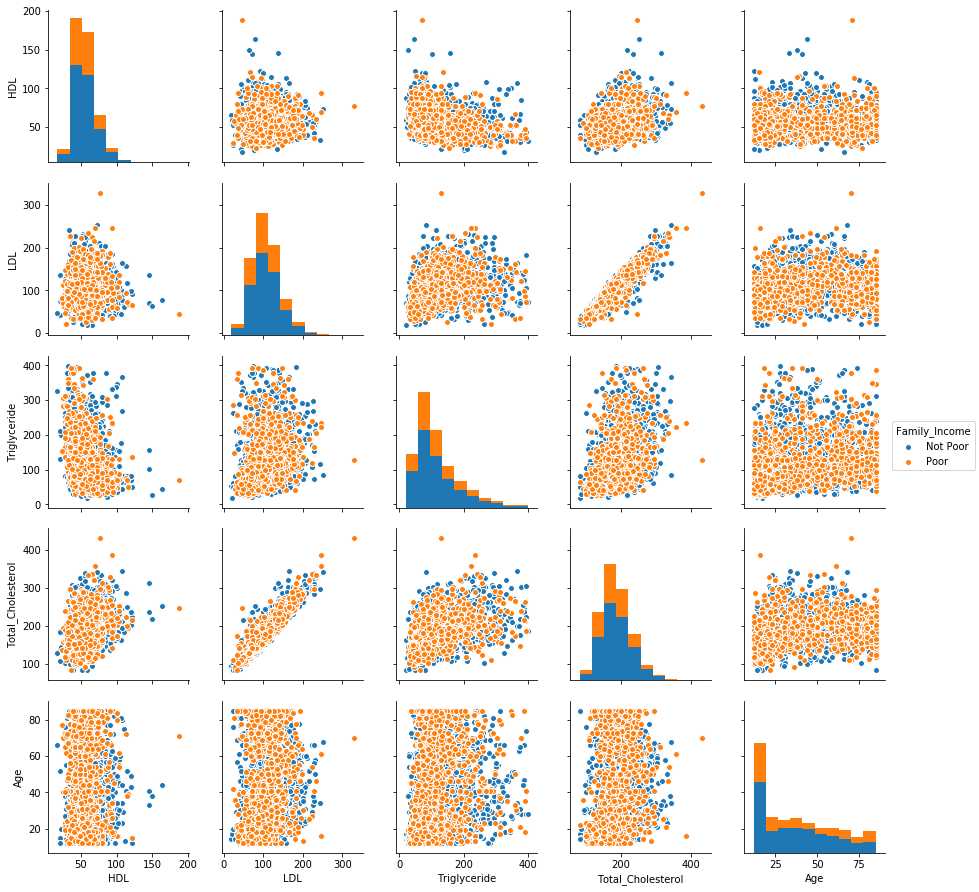

In [8]:
sns.pairplot(df2, hue = 'Family_Income')

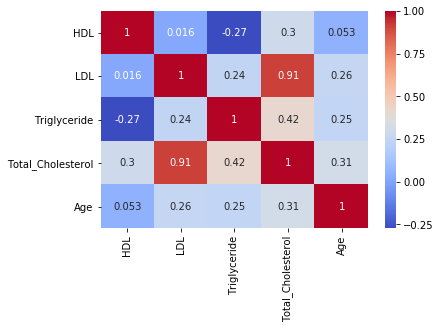

In [9]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)

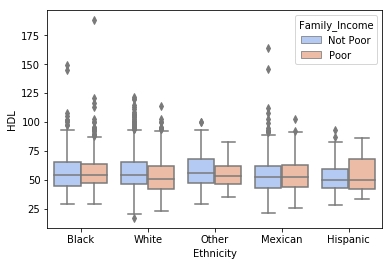

In [10]:
sns.boxplot(x='Ethnicity', y='HDL', data=df2, palette='coolwarm', hue='Family_Income')

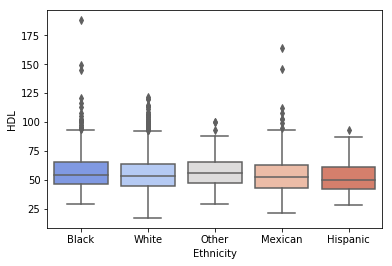

In [11]:
sns.boxplot(x='Ethnicity', y='HDL', data=df2, palette='coolwarm')

In [12]:
HDL_black = np.array(df2[df2['Ethnicity'] == 'Black']['HDL'])
HDL_white = np.array(df2[df2['Ethnicity'] == 'White']['HDL'])
HDL_mexican = np.array(df2[df2['Ethnicity'] == 'Mexican']['HDL'])
HDL_hispanic = np.array(df2[df2['Ethnicity'] == 'Hispanic']['HDL'])
HDL_other = np.array(df2[df2['Ethnicity'] == 'Other']['HDL'])

In [13]:
# One-way ANOVA to test difference among ethnicities

from scipy.stats import f_oneway
f_oneway(HDL_black, HDL_white, HDL_mexican, HDL_hispanic, HDL_other)

F_onewayResult(statistic=4.045024334835634, pvalue=0.002835754170821501)

In [14]:
df2

,HDL,LDL,Triglyceride,Total_Cholesterol,Age,Ethnicity,Family_Income
1,39.0,49.0,86.0,105.0,44.0,Black,Not Poor
2,59.0,75.0,65.0,147.0,70.0,White,Not Poor
3,54.0,81.0,61.0,147.0,16.0,Black,Not Poor
4,49.0,98.0,195.0,186.0,73.0,White,Not Poor
7,53.0,60.0,67.0,126.0,16.0,White,Poor
8,81.0,90.0,50.0,181.0,79.0,White,Poor
9,76.0,104.0,123.0,205.0,59.0,Black,Not Poor
10,50.0,97.0,256.0,198.0,44.0,Other,Poor
11,40.0,91.0,193.0,170.0,38.0,Other,Not Poor
12,71.0,110.0,88.0,199.0,71.0,White,Not Poor
